# In-painting pipeline for Stable Diffusion using 🧨 Diffusers

This notebook shows how to do text-guided in-painting with Stable Diffusion model using  🤗 Hugging Face [🧨 Diffusers library](https://github.com/huggingface/diffusers).

For a general introduction to the Stable Diffusion model please refer to this [colab](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/stable_diffusion.ipynb).

In [ ]:
!pip install kaleido cohere openai tiktoken

In [ ]:
!pip install -qq -U diffusers==0.11.1 transformers ftfy gradio accelerate

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install git+https://github.com/huggingface/diffusers.git

To use private and gated models on 🤗 Hugging Face Hub, login is required. If you are only using a public checkpoint (such as `runwayml/stable-diffusion-inpainting` in this notebook), you can skip this step.

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
import inspect
from typing import List, Optional, Union

import numpy as np
import torch

import PIL
import gradio as gr
from diffusers import StableDiffusionInpaintPipeline

In [ ]:
device = "cuda"
model_path = "runwayml/stable-diffusion-inpainting"

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
).to(device)

In [ ]:
import requests
from io import BytesIO

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = PIL.Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

### copy and paste image

#### 1)

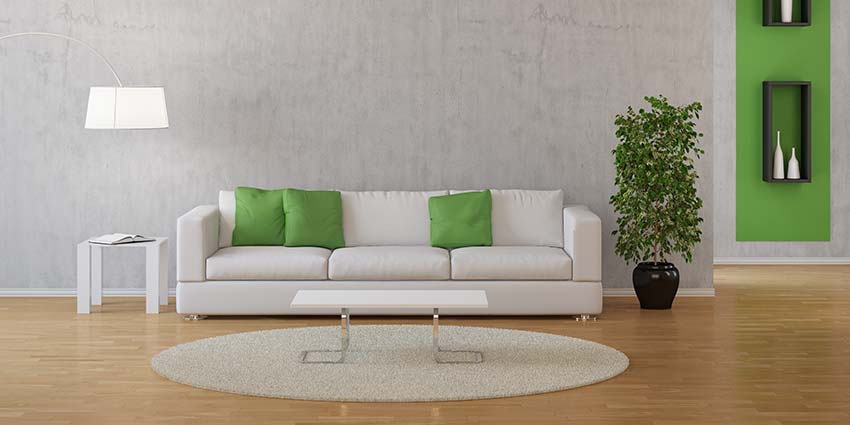

In [ ]:
from PIL import Image

image = Image.open("/content/image_sample.png")
image

In [ ]:
# paste
bbox = [380, 170, 520, 255]
bbox = [int(x) for x in bbox]
x1, y1, x2, y2 = bbox
new_image= Image.open("/content/toy.jpg")
# 바운딩 박스 크기 계산
bbox_width = x2 - x1
bbox_height = y2 - y1
# 바운딩 박스 크기로 새 이미지 조정
new_image = new_image.resize((bbox_width, bbox_height))
image.paste(new_image, bbox)
image.save("output_image.jpg")

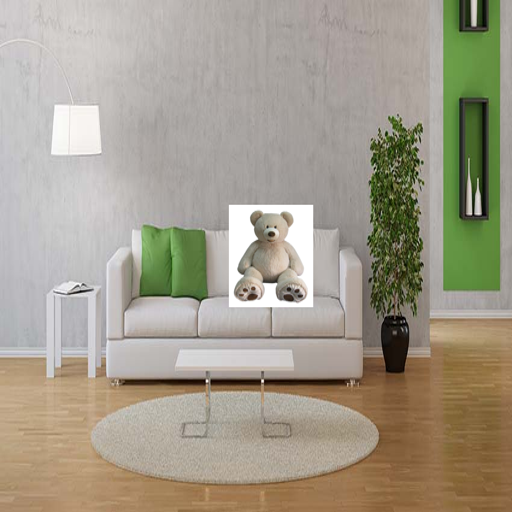

In [ ]:
image = image.resize((512, 512))
image

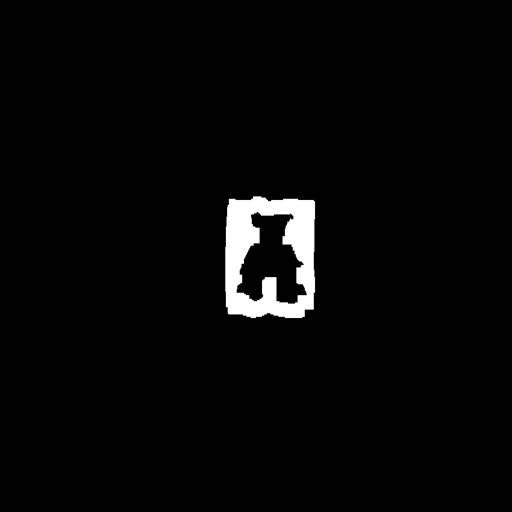

In [ ]:
mask_image = Image.open("/content/output_image (2)_mask.png").resize((512, 512))
mask_image

In [ ]:
prompt = "background"

guidance_scale=9
num_samples = 3
generator = torch.Generator(device="cuda").manual_seed(1) # change the seed to get different results

images = pipe(
    prompt=prompt,
    image=image,
    mask_image=mask_image,
    guidance_scale=guidance_scale,
    generator=generator,
    num_images_per_prompt=num_samples,
).images

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# insert initial image in the list so we can compare side by side
images.insert(0, image)

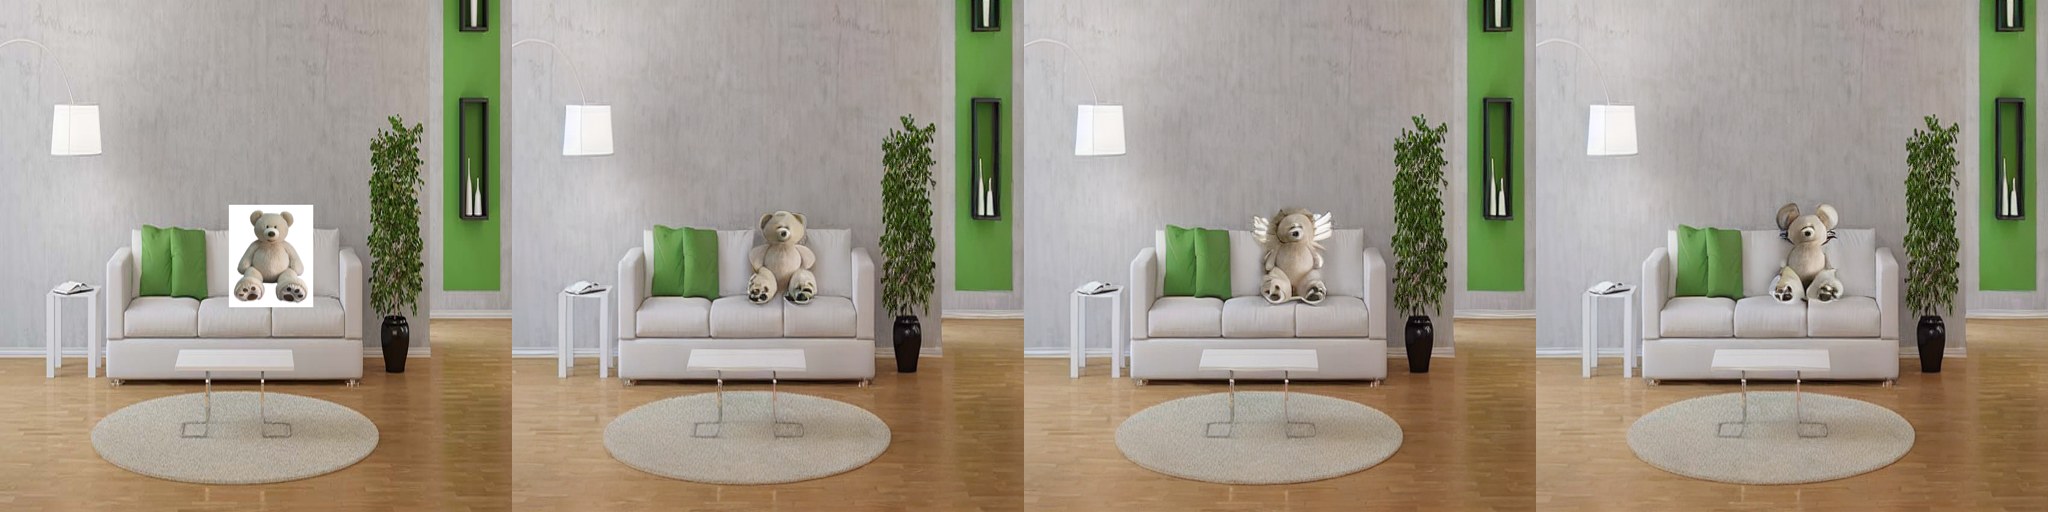

In [ ]:
image_grid(images, 1, num_samples + 1)

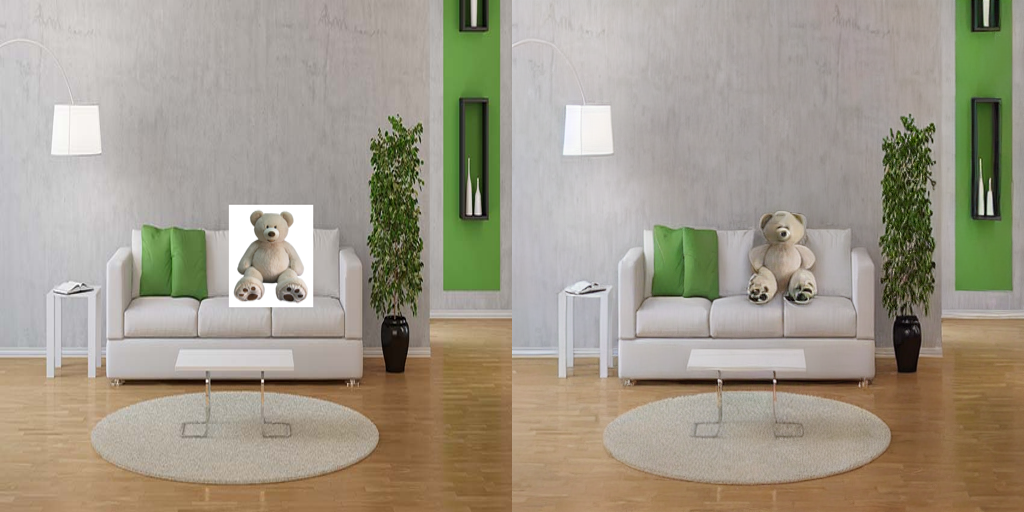

In [ ]:
image_grid(images[:2],1,2)

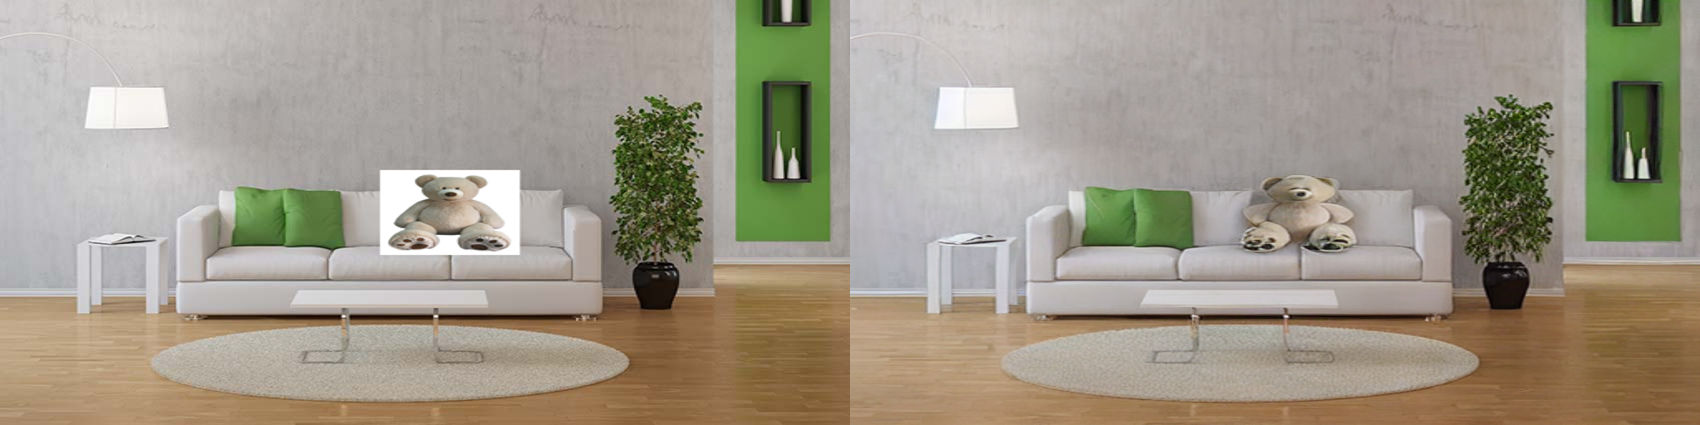

In [ ]:
resized_images = [image.resize((850, 425)) for image in images]

image_grid(resized_images[:2],1,2)

#### 2)

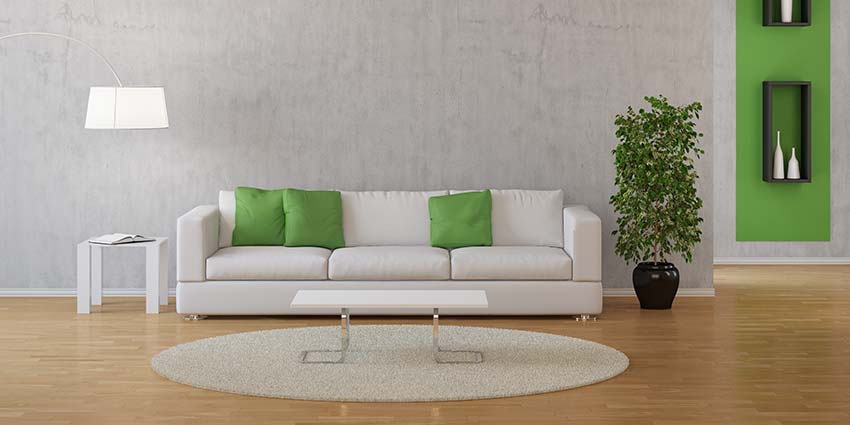

In [ ]:
image = Image.open("/content/image_sample.png")
image

In [ ]:
# paste
bbox = [380, 170, 520, 255]
bbox = [int(x) for x in bbox]
x1, y1, x2, y2 = bbox
new_image= Image.open("/content/pillow.png")
# 바운딩 박스 크기 계산
bbox_width = x2 - x1
bbox_height = y2 - y1
# 바운딩 박스 크기로 새 이미지 조정
new_image = new_image.resize((bbox_width, bbox_height))
image.paste(new_image, bbox)
image.save("output_image.jpg")

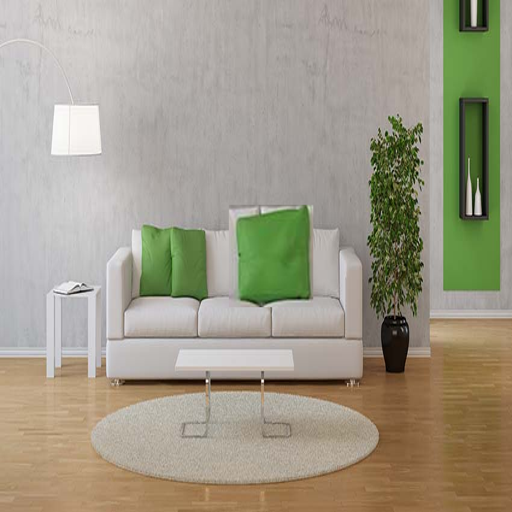

In [ ]:
image = image.resize((512, 512))
image

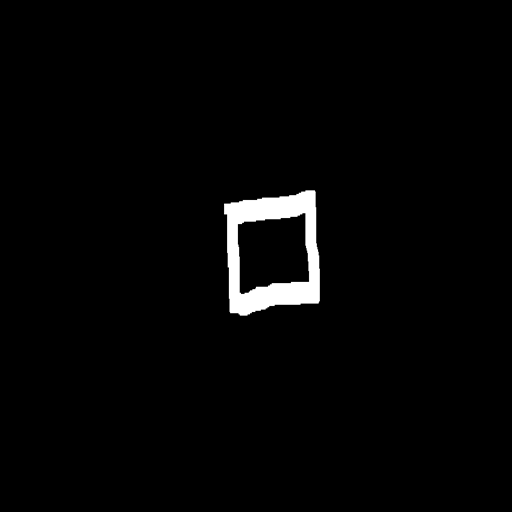

In [ ]:
mask_image = Image.open("/content/output_image (1)_mask.png").resize((512, 512))
mask_image

In [ ]:
prompt = "background"

guidance_scale=9
num_samples = 3
generator = torch.Generator(device="cuda").manual_seed(1) # change the seed to get different results

images = pipe(
    prompt=prompt,
    image=image,
    mask_image=mask_image,
    guidance_scale=guidance_scale,
    generator=generator,
    num_images_per_prompt=num_samples,
).images

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# insert initial image in the list so we can compare side by side
images.insert(0, image)

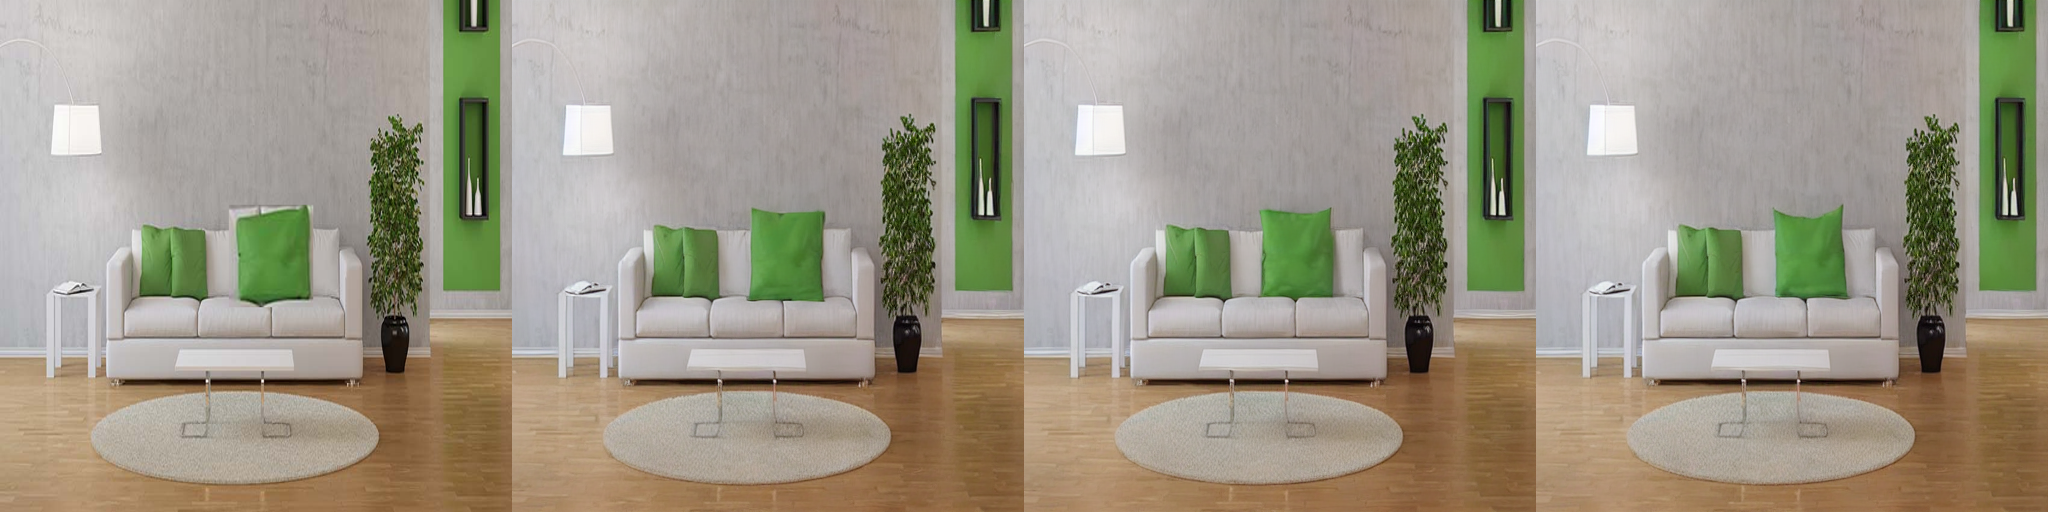

In [ ]:
image_grid(images, 1, num_samples + 1)